# Initial Data Exploration
Preview and Filtering of the data in v62.0_1240k_public.anno from the paper The Allen Ancient DNA Resource (AADR): A curated compendium of ancient human genomes

In [ ]:
# Packages I will use
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#import folium
import geopandas as gpd
#import urllib.request, zipfile, os
from geodatasets import get_path
#import fiona
from shapely.geometry import box
#import scipy.stats as stats

In [2]:
# Load data 
# v62.0_1240k_public.anno
annotation62 = pd.read_csv(
    '/Users/macbook/Documents/Master/Master_Thesis/datasets/Reich_Lab/v62.0_1240k_public.anno',
    sep='\t',
    comment='@',
    na_values='..'
)

/var/folders/xy/1p5cr6sj5cg5clp2xpxlyt3c0000gn/T/ipykernel_7051/155844020.py:3: DtypeWarning: Columns (29,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  annotation62 = pd.read_csv(


In [3]:
# create the file with all the population IDs in dataset
pop_id_full = annotation62['Group ID'].dropna().unique().tolist()
print(len(pop_id_full))

#without the relatedness
pattern = r'_daughter|_son|_sister|_father|_brother|_mother|_contam|_sibling|\.contam\.|_lc\.|\.rel\.|_o'
filtered_df = annotation62[~annotation62['Group ID'].str.contains(pattern, na=False)]
filtered_pop_ids = filtered_df['Group ID'].dropna().unique().tolist()
print(len(filtered_pop_ids))

#Save the list 
with open("pop_id_full_filtered.txt", "w") as f:
    for item in filtered_pop_ids:
        f.write(f"{item}\n")

4323
2726


In [3]:
print('shape of the full dataset:', annotation62.shape)
annotation62.head()

shape of the full dataset: (17629, 42)


,"Genetic ID (suffixes: "".DG"" is a high coverage shotgun genome with diploid genotype calls, "".AG"" is shotgun data with each position in the genome represented by a randomly chosen sequence, "".HO"" is Affymetrix Human Origins genotype data)",Master ID,Skeletal code,Skeletal element,"Year data from this individual was first published [for a present-day individuals we give the data of the data reported here; missing GreenScience 2010 (Vi33.15, Vi33.26), Olalde2018 (I2657), RasmussenNature2010 (Australian)]",Publication abbreviation,doi for publication of this representation of the data,Link to the most permanent repository hosting these data,"Method for Determining Date; unless otherwise specified, calibrations use 95.4% intervals from OxCal v4.4.2 Bronk Ramsey (2009); r5; Atmospheric data from Reimer et al (2020)","Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]",...,mtDNA match to consensus if >2x (merged data),Damage rate in first nucleotide on sequences overlapping 1240k targets (merged data),Sex ratio [Y/(Y+X) counts] (merged data),ANGSD MOM 95% CI truncated at 0 (only if male and >=200 SNPs),hapConX 95% CI truncated at 0 (only if male and >=2000 SNPs covered on X chromosome),"Library type (minus=no.damage.correction, half=damage.retained.at.last.position, plus=damage.fully.corrected, ds=double.stranded.library.preparation, ss=single.stranded.library.preparation)",Libraries,endogenous by library (computed on shotgun data),ASSESSMENT,ASSESSMENT WARNING
0,I0001.AG,Loschbour,Loschbour2,tooth,2014.0,MathiesonNature2018,doi:10.1038/nature25778,ENA:PRJEB22652,Direct: IntCal20,8025,...,NaN,NaN,NaN,NaN,"[0.005,0.012]",NaN,NaN,NaN,PASS,"hapConX=[0.005,0.012]"
1,Kou01.SG,Kou01,Kou01,NaN,2021.0,ClementeCell2021,doi:10.1016/j.cell.2021.03.039,ENA:PRJEB37782,Context: Archaeological,4250,...,NaN,NaN,NaN,n/a (sex unknown),n/a (sex unknown),NaN,NaN,NaN,PASS,NaN
2,Kou03.SG,Kou03,Kou03,NaN,2021.0,ClementeCell2021,doi:10.1016/j.cell.2021.03.039,ENA:PRJEB37782,Context: Archaeological,4250,...,NaN,NaN,NaN,n/a (female),n/a (female),NaN,NaN,NaN,PASS,NaN
3,Log02.SG,Log02,Log02,NaN,2021.0,ClementeCell2021,doi:10.1016/j.cell.2021.03.039,ENA:PRJEB37782,Context: Archaeological,4250,...,NaN,NaN,NaN,n/a (female),n/a (female),NaN,NaN,NaN,PASS,NaN
4,Log04.SG,Log04,Log04,NaN,2021.0,ClementeCell2021,doi:10.1016/j.cell.2021.03.039,ENA:PRJEB37782,Context: Archaeological,4250,...,NaN,NaN,NaN,n/a (female),n/a (female),NaN,NaN,NaN,PASS,NaN


In [26]:
annotation62.columns

Index(['Genetic ID (suffixes: ".DG" is a high coverage shotgun genome with diploid genotype calls, ".AG" is shotgun data with each position in the genome represented by a randomly chosen sequence, ".HO" is Affymetrix Human Origins genotype data)',
       'Master ID', 'Skeletal code', 'Skeletal element',
       'Year data from this individual was first published [for a present-day individuals we give the data of the data reported here; missing GreenScience 2010 (Vi33.15, Vi33.26), Olalde2018 (I2657), RasmussenNature2010 (Australian)]',
       'Publication abbreviation',
       'doi for publication of this representation of the data',
       'Link to the most permanent repository hosting these data',
       'Method for Determining Date; unless otherwise specified, calibrations use 95.4% intervals from OxCal v4.4.2 Bronk Ramsey (2009); r5; Atmospheric data from Reimer et al (2020)',
       'Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of ran

## Filtering of data

In [4]:
# Renaming the columns
filtered_df = filtered_df.rename({'Genetic ID (suffixes: ".DG" is a high coverage shotgun genome with diploid genotype calls, ".AG" is shotgun data with each position in the genome represented by a randomly chosen sequence, ".HO" is Affymetrix Human Origins genotype data)': "Genetic_ID",
                      'Master ID':'Master_ID',
                      'Skeletal code':'Skeletal_code',
                      'Skeletal element':'Skeletal_element',
                      "Year data from this individual was first published [for a present-day individuals we give the data of the data reported here; missing GreenScience 2010 (Vi33.15, Vi33.26), Olalde2018 (I2657), RasmussenNature2010 (Australian)]": "Year_first_published",
                      'doi for publication of this representation of the data':'doi',
                      'Link to the most permanent repository hosting these data': 'Link_repository',
                      'Method for Determining Date; unless otherwise specified, calibrations use 95.4% intervals from OxCal v4.4.2 Bronk Ramsey (2009); r5; Atmospheric data from Reimer et al (2020)':'Method_determining_date',
                      'Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]':'Date_mean_BP',
                      'Date standard deviation in BP [OxCal sigma for a direct radiocarbon date, and standard deviation of the uniform distribution between the two bounds for a contextual date]':'Date_sd_BP',
                      'Full Date One of two formats. (Format 1) 95.4% CI calibrated radiocarbon age (Conventional Radiocarbon Age BP, Lab number) e.g. 2624-2350 calBCE (3990±40 BP, Ua-35016). (Format 2) Archaeological context range, e.g. 2500-1700 BCE':'Full_date',
                      'Age at death, Morphological sex from physical anthropology':'Age_death',
                      'Group ID':'Group_ID',
                      'Political Entity':'Political_entity', 
                      'Lat.':'Lat', 
                      'Long.':'Long',
                      'Pulldown Strategy':'Pulldown_strategy',
                      'Suffices (indicating data types used for sources which can be a subset of that in bam)':'Surffices',
                      'Data type': 'Data_type',
                      'No. Libraries':'No_libraries',
                      'SNPs hit on autosomal targets (Computed using easystats on 1240k snpset)':'SNPs_autosomal_target_1240k',
                      'SNPs hit on autosomal targets (Computed using easystats on HO snpset)':'SNPs_autosomal_target_HO',
                      'Molecular Sex':'Molecular_sex', 
                      'Sum total of ROH segments >4 cM':'Sum_total_ROHsegments_4cM',
                      'Sum total of ROH segments >20cM':'Sum_total_ROHsegments_20cM',
                      'Y haplogroup in terminal mutation notation automatically called based on Yfull with the software described in Lazaridis et al. Science 2022':'Y_haplogroup_terminal_mut',
                      'Y haplogroup  in ISOGG v15.73 notation automatically called based on Yfull with the software described in Lazaridis et al. Science 2022':'Y_haplogroup_ISOGG',
                      'Y haplogroup manually called if different from automatic':'Y_haplogroup_manually_called',
                      'mtDNA coverage (merged data)':'mtDNA_coverage', 
                      'mtDNA haplogroup if >2x or published':'mtDNA_haplogroup',
                      'mtDNA match to consensus if >2x (merged data)':'mtDNA_match_consensus',
                      'Damage rate in first nucleotide on sequences overlapping 1240k targets (merged data)':'Damage_rate_first_nucl',
                      'Sex ratio [Y/(Y+X) counts] (merged data)':'Sex_ratio',	
                      'ANGSD MOM 95% CI truncated at 0 (only if male and >=200 SNPs)':'ANGSD_MOM_95_CI',	
                      'hapConX 95% CI truncated at 0 (only if male and >=2000 SNPs covered on X chromosome)':'hapConX_95CI',	
                      'Library type (minus=no.damage.correction, half=damage.retained.at.last.position, plus=damage.fully.corrected, ds=double.stranded.library.preparation, ss=single.stranded.library.preparation)':'Library_type',	
                      'endogenous by library (computed on shotgun data)':'Endogenous_by_library',	
                      'ASSESSMENT WARNING':'ASSESSMENT_WARNING'
                       }, axis="columns")

In [5]:
# Include only important populations
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Disable line wrapping
pd.set_option('display.max_rows', None)     # Show all rows

pattern = r'Canada|Siberia|Aleut|Dorset|Greenland|Bering|Eskimo'
semisubset_df = filtered_df[filtered_df['Group_ID'].str.contains(pattern, na=False)]
print(len(semisubset_df['Group_ID'].unique()))
semisubset_df.head(5)

36


,Genetic_ID,Master_ID,Skeletal_code,Skeletal_element,Year_first_published,Publication abbreviation,doi,Link_repository,Method_determining_date,Date_mean_BP,Date_sd_BP,Full_date,Age_death,Group_ID,Locality,Political_entity,Lat,Long,Pulldown_strategy,Surffices,Data_type,No_libraries,SNPs_autosomal_target_1240k,SNPs_autosomal_target_HO,Molecular_sex,Sum_total_ROHsegments_4cM,Sum_total_ROHsegments_20cM,Y_haplogroup_terminal_mut,Y_haplogroup_ISOGG,Y_haplogroup_manually_called,mtDNA_coverage,mtDNA_haplogroup,mtDNA_match_consensus,Damage_rate_first_nucl,Sex_ratio,ANGSD_MOM_95_CI,hapConX_95CI,Library_type,Libraries,Endogenous_by_library,ASSESSMENT,ASSESSMENT_WARNING
855,I1126.AG,I1126,378622 (Drawer 2),bone (rib),2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING NEEDS MARINE CALIBRATION IN In...,965,147.0,"730-1240 calCE (1830±84 BP, AA-46418)",NaN,USA_AK_PaleoAleut.AG,"Chaluka Midden (Alaska, Aleutian Islands, Umna...",USA,52.988368,-168.82057,Native Pulldown on 3.2M snpset,AG,1240k,1.0,106119,55754,M,n/a (<300K SNPs),n/a (<300K SNPs),Q-Z36017,Q1a1b,NaN,25,D2a1a,"[0.986,0.998]",0.024,0.450,n/a (16 SNPs),n/a (<2000 X SNPs),ds.half,S1126.E1.L2,0.019,PASS,"damage.ds.half=0.024, low.damage.mitigated.bec..."
895,I1525.AG,I1525,"Mos99 (Specimen 13, 172)","bone,tooth",2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,"Direct (WARNING NEED R_combine, NEED MARINE CA...",1695,113.0,"60-450 calCE (2560±20 BP, PSUAMS-1962)",NaN,Russia_Uelen_OldBeringSea.AG,"Uelen (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.161126,-169.82230,Native Pulldown on 3.2M snpset,AG,1240k,2.0,895059,478043,F,108.258704,0,n/a (female),n/a (female),NaN,666.022874,A2a,"[0.996,1]",NaN,NaN,n/a (female),n/a (female),"ds.half,ds.half","S1525.E1.L1,S7758.E1.L1","0.168,0.596",PASS,NaN
1875,I7331.AG,I7331,"Mos101 (Specimen 3, 153)",tooth,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING TO MARINE CALIBRATE IN IntCal2...,1045,107.0,"720-1090 calCE (1900±20 BP, PSUAMS-3736)",NaN,Russia_Ekven_OldBeringSea.AG,"Ekven (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.121383,-170.46034,Native Pulldown on 3.2M snpset,AG,1240k,1.0,868900,459131,M,140.45329,27.664801,Q-Y4303,Q1b1a1a,NaN,259,A2b1,"[0.988,0.995]",0.015,0.416,"[0.002,0.006]","[0.002,0.004]",ds.half,S7331.E1.L1,0.374,PASS,damage.ds.half=0.015
1876,I7333.AG,I7333,"Mos103 (Specimen 19, 162)",tooth,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING TO MARINE CALIBRATE IN IntCal2...,1250,110.0,"510-890 calCE (2155±20 BP, PSUAMS-4835)",NaN,Russia_Ekven_OldBeringSea.AG,"Ekven (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.121383,-170.46034,Native Pulldown on 3.2M snpset,AG,1240k,1.0,855430,453538,F,87.395306,0,n/a (female),n/a (female),NaN,312,A2a,"[0.996,1.000]",0.014,0.014,n/a (female),n/a (female),ds.half,S7333.E1.L1,0.431,PASS,"low.damage.probably.ok.because.so.recent, dama..."
1878,I7337.AG,I7337,Mos112 (Specimen 5b),tooth,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING TO MARINE CALIBRATE IN IntCal2...,1150,104.0,"620-980 calCE (2055±15 BP, PSUAMS-5328)",NaN,Russia_Ekven_OldBeringSea.AG,"Ekven (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.121383,-170.46034,Native Pulldown on 3.2M snpset,AG,1240k,1.0,790358,417348,M,158.259771,0,Q-Z36017,Q1a1b,NaN,139,A2a2,"[0.940,0.964]",0.012,0.420,"[0,0.004]","[0,0.003]",ds.half,S7337.E1.L1,0.088,PASS,"damage.ds.half=0.012, mtcontam=[0.94,0.964], A..."


In [6]:
#Select only Russian populations
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Disable line wrapping


pattern = r'Sakha|Chukotka|Kamchatka|Magadan'
russia = filtered_df[filtered_df['Locality'].str.contains(pattern, na=False)]
russia.head(5)

,Genetic_ID,Master_ID,Skeletal_code,Skeletal_element,Year_first_published,Publication abbreviation,doi,Link_repository,Method_determining_date,Date_mean_BP,Date_sd_BP,Full_date,Age_death,Group_ID,Locality,Political_entity,Lat,Long,Pulldown_strategy,Surffices,Data_type,No_libraries,SNPs_autosomal_target_1240k,SNPs_autosomal_target_HO,Molecular_sex,Sum_total_ROHsegments_4cM,Sum_total_ROHsegments_20cM,Y_haplogroup_terminal_mut,Y_haplogroup_ISOGG,Y_haplogroup_manually_called,mtDNA_coverage,mtDNA_haplogroup,mtDNA_match_consensus,Damage_rate_first_nucl,Sex_ratio,ANGSD_MOM_95_CI,hapConX_95CI,Library_type,Libraries,Endogenous_by_library,ASSESSMENT,ASSESSMENT_WARNING
895,I1525.AG,I1525,"Mos99 (Specimen 13, 172)","bone,tooth",2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,"Direct (WARNING NEED R_combine, NEED MARINE CA...",1695,113.0,"60-450 calCE (2560±20 BP, PSUAMS-1962)",NaN,Russia_Uelen_OldBeringSea.AG,"Uelen (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.161126,-169.82230,Native Pulldown on 3.2M snpset,AG,1240k,2.0,895059,478043,F,108.258704,0,n/a (female),n/a (female),NaN,666.022874,A2a,"[0.996,1]",NaN,NaN,n/a (female),n/a (female),"ds.half,ds.half","S1525.E1.L1,S7758.E1.L1","0.168,0.596",PASS,NaN
1875,I7331.AG,I7331,"Mos101 (Specimen 3, 153)",tooth,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING TO MARINE CALIBRATE IN IntCal2...,1045,107.0,"720-1090 calCE (1900±20 BP, PSUAMS-3736)",NaN,Russia_Ekven_OldBeringSea.AG,"Ekven (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.121383,-170.46034,Native Pulldown on 3.2M snpset,AG,1240k,1.0,868900,459131,M,140.45329,27.664801,Q-Y4303,Q1b1a1a,NaN,259,A2b1,"[0.988,0.995]",0.015,0.416,"[0.002,0.006]","[0.002,0.004]",ds.half,S7331.E1.L1,0.374,PASS,damage.ds.half=0.015
1876,I7333.AG,I7333,"Mos103 (Specimen 19, 162)",tooth,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING TO MARINE CALIBRATE IN IntCal2...,1250,110.0,"510-890 calCE (2155±20 BP, PSUAMS-4835)",NaN,Russia_Ekven_OldBeringSea.AG,"Ekven (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.121383,-170.46034,Native Pulldown on 3.2M snpset,AG,1240k,1.0,855430,453538,F,87.395306,0,n/a (female),n/a (female),NaN,312,A2a,"[0.996,1.000]",0.014,0.014,n/a (female),n/a (female),ds.half,S7333.E1.L1,0.431,PASS,"low.damage.probably.ok.because.so.recent, dama..."
1878,I7337.AG,I7337,Mos112 (Specimen 5b),tooth,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING TO MARINE CALIBRATE IN IntCal2...,1150,104.0,"620-980 calCE (2055±15 BP, PSUAMS-5328)",NaN,Russia_Ekven_OldBeringSea.AG,"Ekven (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.121383,-170.46034,Native Pulldown on 3.2M snpset,AG,1240k,1.0,790358,417348,M,158.259771,0,Q-Z36017,Q1a1b,NaN,139,A2a2,"[0.940,0.964]",0.012,0.420,"[0,0.004]","[0,0.003]",ds.half,S7337.E1.L1,0.088,PASS,"damage.ds.half=0.012, mtcontam=[0.94,0.964], A..."
1879,I7338.AG,I7338,"Mos87 (Specimen 74, 177)",tooth,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING TO MARINE CALIBRATE IN IntCal2...,610,75.0,"1210-1470 calCE (1485±15 BP, PSUAMS-5329)",NaN,Russia_Ekven_OldBeringSea.AG,"Ekven (Chukotka Autonomous Okrug, Chukotsky Di...",Russia,66.121383,-170.46034,Native Pulldown on 3.2M snpset,AG,1240k,1.0,799893,427887,M,94.370379,0,Q-M3,Q1b1a1a,NaN,128,A2b1,"[0.988,0.996]",0.006,0.428,"[0,0.002]","[0,0.001]",ds.half,S7338.E1.L1,0.178,PASS,"damage.ds.half=0.006, hapConX=[0,0.001]"


In [7]:
#Select only USA populations
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Disable line wrapping


pattern = r'USA_AK|USA_Alaska|USA_Ancient_Beringian|USA_Anzick|USA_Nevada|USA_PA|USA_WA'
usa = filtered_df[filtered_df['Group_ID'].str.contains(pattern, na=False)]
usa.head(5)

,Genetic_ID,Master_ID,Skeletal_code,Skeletal_element,Year_first_published,Publication abbreviation,doi,Link_repository,Method_determining_date,Date_mean_BP,Date_sd_BP,Full_date,Age_death,Group_ID,Locality,Political_entity,Lat,Long,Pulldown_strategy,Surffices,Data_type,No_libraries,SNPs_autosomal_target_1240k,SNPs_autosomal_target_HO,Molecular_sex,Sum_total_ROHsegments_4cM,Sum_total_ROHsegments_20cM,Y_haplogroup_terminal_mut,Y_haplogroup_ISOGG,Y_haplogroup_manually_called,mtDNA_coverage,mtDNA_haplogroup,mtDNA_match_consensus,Damage_rate_first_nucl,Sex_ratio,ANGSD_MOM_95_CI,hapConX_95CI,Library_type,Libraries,Endogenous_by_library,ASSESSMENT,ASSESSMENT_WARNING
855,I1126.AG,I1126,378622 (Drawer 2),bone (rib),2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING NEEDS MARINE CALIBRATION IN In...,965,147.0,"730-1240 calCE (1830±84 BP, AA-46418)",NaN,USA_AK_PaleoAleut.AG,"Chaluka Midden (Alaska, Aleutian Islands, Umna...",USA,52.988368,-168.82057,Native Pulldown on 3.2M snpset,AG,1240k,1.0,106119,55754,M,n/a (<300K SNPs),n/a (<300K SNPs),Q-Z36017,Q1a1b,NaN,25,D2a1a,"[0.986,0.998]",0.024,0.450,n/a (16 SNPs),n/a (<2000 X SNPs),ds.half,S1126.E1.L2,0.019,PASS,"damage.ds.half=0.024, low.damage.mitigated.bec..."
1484,I5319.AG,I5319,MT_1,petrous,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING NEEDS MARINE CALIBRATION IN In...,725,101.0,"1050-1400 calCE (1170±30 BP, Beta-337194)",30-40 yrs,USA_AK_Ancient_Athabaskan_1100BP.AG,"Upper Kuskokwim River (Alaska, western interio...",USA,62.951189,-155.59472,Native Pulldown on 3.2M snpset,AG,1240k,3.0,997159,526870,M,48.3522,0,Q-Y4294,Q1b1a1a,NaN,231.101092,A2a1,"[0.985,0.999]",NaN,NaN,"[0.002,0.006]","[0.004,0.005]","ds.half,ds.half,ds.half","S5319.E1.L1,S5319.E2.L1,S5319.E2.L2","0.535,0.789,0.758",PASS,NaN
1486,I5321.AG,I5321,MT_3,petrous,2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Context: Date(s) on 2d/3d relative I5319,725,130.0,1000-1450 CE,"child, 2-3 yrs",USA_AK_Ancient_Athabaskan_1100BP.AG,"Upper Kuskokwim River (Alaska, western interio...",USA,62.951189,-155.59472,Native Pulldown on 3.2M snpset,AG,1240k,3.0,1020106,538035,F,265.594521,76.084111,n/a (female),n/a (female),NaN,344.65182,A2+(64),"[0.993,1]",NaN,NaN,n/a (female),n/a (female),"ds.half,ds.half,ds.half","S5321.E1.L1,S5321.E2.L1,S5321.E2.L2","0.446,0.705,0.661",PASS,NaN
2302,I0712.AG,I0712,378623 (Drawer 1),bone (rib),2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING NEEDS MARINE CALIBRATION IN In...,1065,113.0,"690-1080 calCE (1918±43 BP, AA-57414)",NaN,USA_AK_PaleoAleut.AG,"Chaluka Midden (Alaska, Aleutian Islands, Umna...",USA,52.988368,-168.82057,Native Pulldown on 3.2M snpset,AG,1240k,1.0,411398,229962,F,63.347021,0,n/a (female),n/a (female),NaN,51.6,D2a1a,"[0.984,0.993]",0.015,0.003,n/a (female),n/a (female),ds.half,S0712.E1.L1,0.022,PASS,damage.ds.half=0.015
2303,I0719.AG,I0719,378620 (Drawer 2),bone (rib),2019.0,FlegontovNature2019,doi:10.1038/s41586-019-1251-y,ENA:PRJEB30575,Direct (WARNING NEEDS MARINE CALIBRATION IN In...,505,113.0,"1250-1640 calCE (1348±82 BP, AA-46416)",NaN,USA_AK_PaleoAleut.AG,"Chaluka Midden (Alaska, Aleutian Islands, Umna...",USA,52.988368,-168.82057,Native Pulldown on 3.2M snpset,AG,1240k,1.0,921378,510568,M,50.360804,0,Q-YP4010,Q1b1b~,NaN,326,D2a1a,"[0.992,0.996]",0.014,0.499,"[0,0.003]","[0,0.001]",ds.half,S0719.E1.L1,0.234,PASS,damage.ds.half=0.014


In [8]:
#merge the 3 data frames and delete duplicates
# 1. Concatenate them
subset_df = pd.concat([semisubset_df, russia, usa], ignore_index=True)

# 2. Drop duplicate rows
subset_df = subset_df.drop_duplicates()

subset_df.shape

(141, 42)

In [66]:
# Save as a csv
subset_df.to_csv('/Users/macbook/Documents/Master/Master_Thesis/scripts/Data_Selection/subset2.csv')

In [ ]:
# get population list
pop_id_subset = subset_df['Group_ID'].dropna().unique().tolist()

# save subset
with open("pop_id_subset.txt", "w") as f:
    for item in pop_id_subset:
        f.write(f"{item}\n")

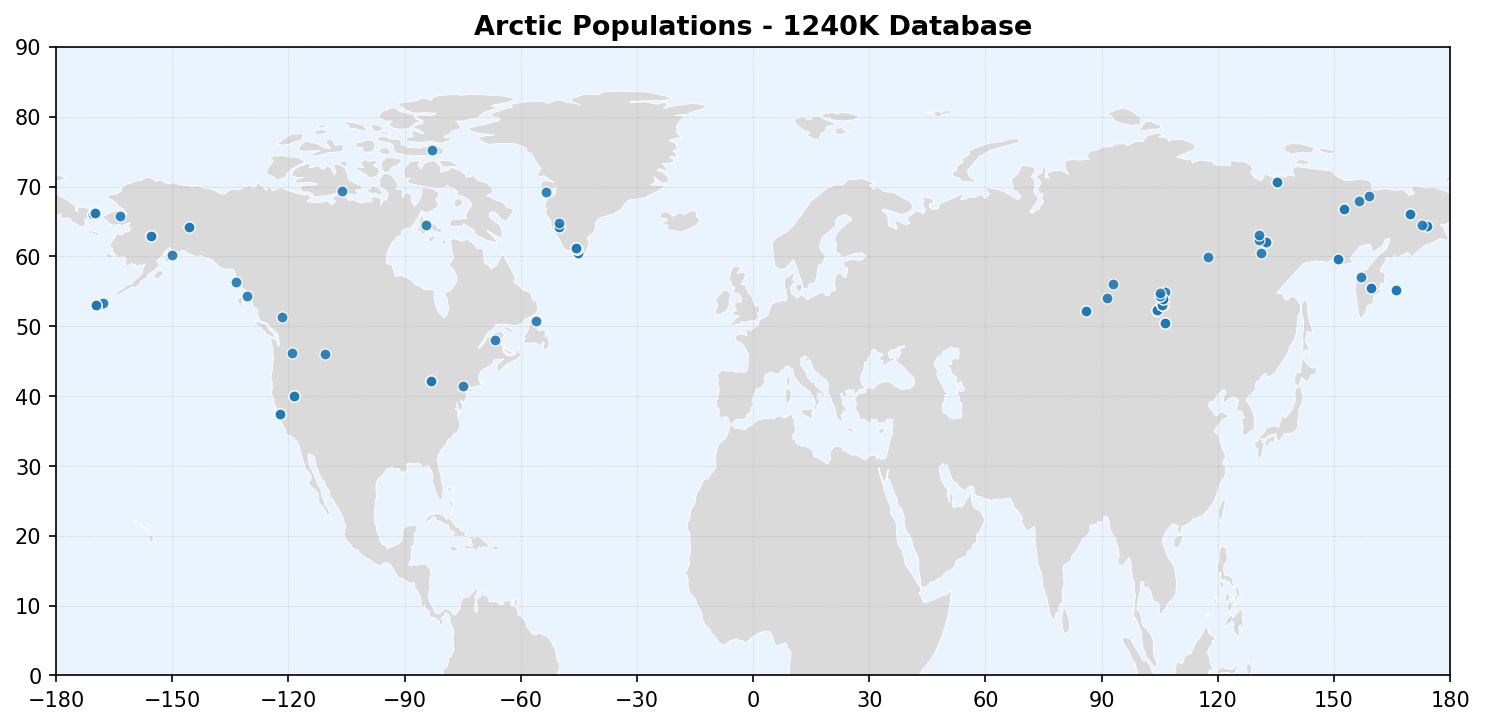

In [9]:
# Plot locations of selected populations
#Basemap
world = gpd.read_file(get_path("naturalearth.land")) 

#Points
gdf = gpd.GeoDataFrame(
    subset_df,
    geometry=gpd.points_from_xy(subset_df['Long'], subset_df['Lat']),
    crs="EPSG:4326"
)

#Northern Hemisphere ROI (all longitudes, lat >= 0)
roi = gpd.GeoDataFrame(geometry=[box(-180, 0, 180, 90)], crs="EPSG:4326")

# Clip plot
world_nh = gpd.clip(world, roi)
gdf_nh   = gpd.clip(gdf, roi)

#Plot:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Land
world_nh.plot(ax=ax, color="#DADADA", edgecolor="#FFFFFF", linewidth=0.4, zorder=1)

# Points
gdf_nh.plot(ax=ax, color="#1F77B4", markersize=28, alpha=0.9,
            edgecolor="white", linewidth=0.6, zorder=2)

# Formating
ax.set_facecolor("#EAF4FF")  # light ocean
ax.set_title("Arctic Populations - 1240K Database", fontsize=13, weight="bold")

# Simple graticule-like grid
xticks = np.arange(-180, 181, 30)
yticks = np.arange(0, 91, 10)
ax.set_xticks(xticks); ax.set_yticks(yticks)
ax.grid(True, which="both", linewidth=0.3, linestyle=":", color="#888888", alpha=0.6)

# Tighten to North Hemisphere
ax.set_xlim(-180, 180)
ax.set_ylim(0, 90)

plt.tight_layout()
plt.savefig("map_northern_hemisphere_geopandas.png", dpi=300)
plt.savefig("map_northern_hemisphere_geopandas.pdf")
plt.show()
